In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
file1="bank_loan_data.csv"

In [71]:
loan_df=pd.read_csv(file1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [72]:
# col=loan_df.columns
# col

In [73]:
loan_df.drop('Loan_ID',axis=1,inplace=True)

In [74]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [75]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Seperate the Catgorical or Numerical columns

In [77]:
cat_col=loan_df.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
len(cat_col)

7

In [79]:
num_col=loan_df.select_dtypes(exclude='object').columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [80]:
len(num_col)

5

## find the missing value in catgorical column

In [81]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
loan_df.shape

(614, 12)

## fill the missing value

In [83]:
fill_df=loan_df.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [84]:
fill_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
# for col in cate_columns:
#     fill_value = df[col].mode()[0]
#     df[col] = df[col].fillna(fill_value)

## Target variable

- here target variable is loan_status 
- it is catgorical variable now find out is frequency table percentage distribution and barplot

## frequency table of loan_status

In [86]:
fre_table=loan_df['Loan_Status'].value_counts()
fre_table

Loan_Status
Y    422
N    192
Name: count, dtype: int64

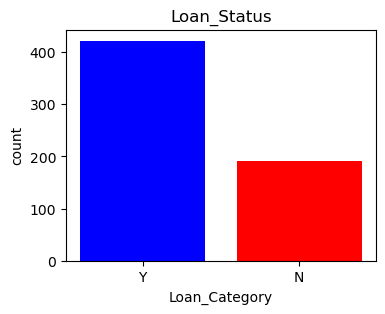

In [87]:
plt.figure(figsize=(4,3))
plt.bar(fre_table.index,fre_table.values,color=['blue','red'])
plt.title("Loan_Status")
plt.xlabel('Loan_Category')
plt.ylabel('count')
plt.show()

### normalize the Loan_Status columns to find the percentage

In [88]:
loan_per=loan_df['Loan_Status'].value_counts(normalize=True)*100
loan_per

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Loan_status')

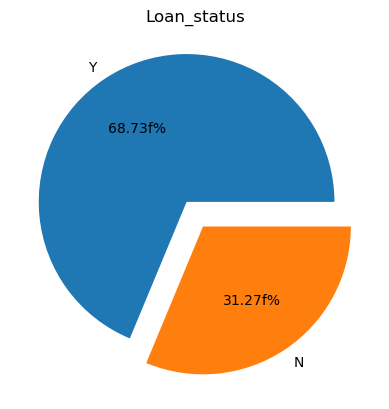

In [89]:
plt.pie(loan_per.values,labels=loan_per.index,autopct='%1.2ff%%',radius=1,explode=[0.1,0.1])
plt.title("Loan_status")

### Gender Variable Analysis

In [116]:
Gen_count=loan_df['Gender'].value_counts().reset_index()
Gen_count

,Gender,count
0,Male,489
1,Female,112


<BarContainer object of 2 artists>

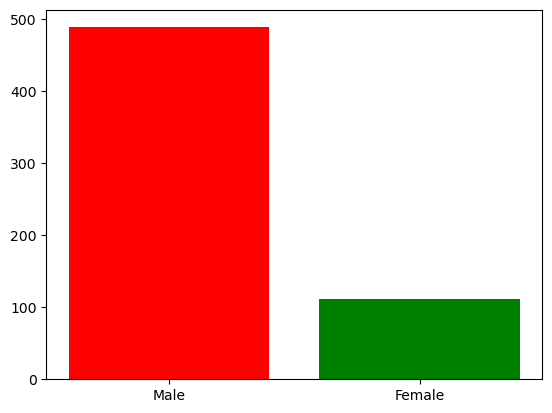

In [118]:
plt.bar('Gender','count',data=Gen_count,color=['red','green'])

In [123]:
gen_pie=loan_df['Gender'].value_counts(normalize=True)*100
gen_pie

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

In [130]:
len(gen_pie)

2

Text(0.5, 1.0, 'Gender Analysis')

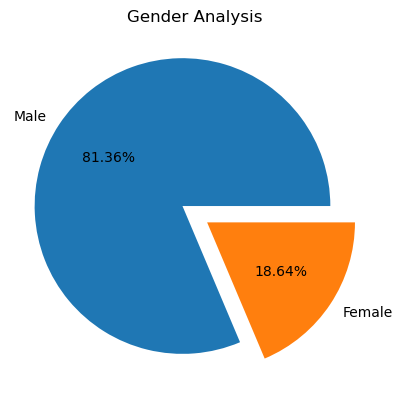

In [129]:
plt.pie(gen_pie.values,labels=gen_pie.index,autopct='%0.2f%%',explode=[0.1,0.1])
plt.title("Gender Analysis")